TODO:
- cruzar regras de atendimento parcial com metas do mes (ating/pont/acum)
- acum pode significar ating+pontos
- transformar em regex
- nom_grupo_cargo x nom_cargo x nom_area
- dis_grade x nom_banda

# Ambev data challenge
## Adriano Freitas

## Analisando os dados

Este notebook tem o objetivo de fazer uma análise exploratória. Baseado no que encontrarmos aqui vamos organizar as principais tranformações necessárias no código para a construção de uma base de dados limpa o suficiente para os algoritmos que vamos rodar.

In [1]:
%%capture

%run ./00-agf-utils.ipynb

%store -r default_color
%store -r default_light_color
%store -r default_dark_color
%store -r colormap
%store -r figsize

In [2]:
data_path = '../data/processed/'
file_name = 'ambev-final-dataset-processed.csv'

In [4]:
df = pd.read_csv(os.path.join(data_path, file_name))
df.shape
df.head()

(106217, 33)

,Unnamed: 0,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
0,0,3.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001VA0561,Diretoria de Vendas e Distribuição,AC,GER DE VENDAS,Mandatório,Market Share/ Volume,4729.00,25.00,12/31/2017 12:00:00 AM,"PA1: 99,5% da meta PA2: 99,0% da meta",0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,100.00,25.00
1,2,3.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001TM0051,Diretoria de Vendas e Distribuição,Trade Marketing,GER DE VENDAS,Mandatório,Market Share/ Volume,3103.00,20.00,12/31/2017 12:00:00 AM,PA1: 80% = 80% pts PA2: 60% = 60% pts,0.00,80.00,60.00,12.00,80.00,60.00,12.00,100.00,100.00,20.00
2,3,3.00,Brasil,Sales,10.00,78.00,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.00,VI-B,GERÊNCIA CD,2774.00,237.00,001VC0272,Diretoria de Vendas e Distribuição,Campo,GER DE VENDAS,Mandatório,Market Share/ Volume,4757.00,15.00,12/31/2017 12:00:00 AM,PA1: 95%_x000D_ PA2: 90%,0.00,100.00,100.00,15.00,90.00,80.00,12.00,100.00,100.00,15.00
3,6,3.00,Brasil,Supply,20.00,14.00,SUPERVISOR FABRIL,SUPERVISOR SENIOR FABRIL,11.00,VI-C,PRODUçãO,7548.00,1983.00,001CC0161,Diretoria Industrial,CENG/CDT,SUPERVISOR,Mandatório,Melhoria Contínua,2424.00,20.00,12/31/2017 12:00:00 AM,100%: LTI (area) = 0 e LTI Fab <= Bgt e TRI (a...,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00
4,8,3.00,Brasil,Supply,20.00,14.00,SUPERVISOR FABRIL,SUPERVISOR SENIOR FABRIL,11.00,VI-C,PRODUçãO,7548.00,1983.00,001SC0434,Diretoria Industrial,Campo,SUPERVISOR,Mandatório,Melhoria Contínua,4580.00,20.00,12/31/2017 12:00:00 AM,Conforme Matriz de Metas VPO 2017 disponível n...,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00


## Organizando os dados no tempo

Antes de mais nada, este dataset se trata de uma série temporal, então vamos organizar os dados no tempo. Vamos ordenar por mes, meta e funcionário.

In [6]:
df.sort_values(by=['ord_mes_referencia', 'nom_codigo_kpi', 'dis_nome_funcionario'], inplace=True).reset_index()
df.head()

,Unnamed: 0,ord_mes_referencia,nom_pais,nom_mundo,dis_regional_area,dis_unidade,nom_grupo_cargo,nom_cargo,dis_grade,nom_banda,nom_area,dis_nome_funcionario,dis_nome_gestor,nom_codigo_kpi,nom_diretoria,nom_areas_diretoria,nom_funcao,nom_tipo_meta,nom_categoria_kpi,dis_nome_kpi,per_peso_kpi,nom_prazo,nom_regra_alcance_parcial,bin_meta_projeto,per_ating_mes,per_pontos_mes,per_acum_mes,per_ating_acumulado,per_pontos_acumulado,per_acum_acumulado,per_ating_fim_exer,per_pontos_fim_exer,per_acum_fim_exer
4286,10055,3.00,Brasil,Supply,2.00,192.00,ANALISTA,ANALISTA III,10.00,VII-A,CENG,409.00,934.00,001CC0069,Diretoria Industrial,CENG/CDT,ANALISTA,Mandatório,Cash Flow,1990.00,20.00,12/31/2017 12:00:00 AM,100 % = 5 KPI?s 90% = 4 KPI?s80% = 3 KPI?s,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00
5659,13042,3.00,Brasil,Supply,2.00,192.00,ANALISTA,ANALISTA II,9.00,VII-B,CENG,1537.00,1640.00,001CC0069,Diretoria Industrial,CENG/CDT,ANALISTA,Mandatório,Cash Flow,1990.00,20.00,12/31/2017 12:00:00 AM,100 % = 5 KPI?s 90% = 4 KPI?s80% = 3 KPI?s,0.00,80.00,60.00,12.00,80.00,60.00,12.00,100.00,100.00,20.00
4364,10223,3.00,Brasil,Supply,2.00,192.00,ANALISTA,ANALISTA IV,11.00,VI-C,CENG,1681.00,934.00,001CC0069,Diretoria Industrial,CENG/CDT,ANALISTA,Mandatório,Cash Flow,1990.00,20.00,12/31/2017 12:00:00 AM,100 % = 5 KPI?s 90% = 4 KPI?s80% = 3 KPI?s,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00
4430,10375,3.00,Brasil,Supply,2.00,192.00,ANALISTA,ANALISTA III,10.00,VII-A,CENG,2007.00,934.00,001CC0069,Diretoria Industrial,CENG/CDT,ANALISTA,Mandatório,Cash Flow,1990.00,20.00,12/31/2017 12:00:00 AM,100 % = 5 KPI?s 90% = 4 KPI?s80% = 3 KPI?s,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00
4179,9781,3.00,Brasil,Supply,2.00,192.00,ANALISTA,ANALISTA IV,11.00,VI-C,CENG,2445.00,293.00,001CC0069,Diretoria Industrial,CENG/CDT,ANALISTA,Mandatório,Cash Flow,1990.00,20.00,12/31/2017 12:00:00 AM,100 % = 5 KPI?s 90% = 4 KPI?s80% = 3 KPI?s,0.00,100.00,100.00,20.00,100.00,100.00,20.00,100.00,100.00,20.00


### Variáveis numéricas

In [36]:
num_cols = meta.filter(regex='^dis_|con_|per_', axis=0).index.values
num_cols
print('Total de variávei numéricas: {}'.format(len(num_cols)))

array(['dis_regional_area', 'dis_unidade', 'dis_grade',
       'dis_nome_funcionario', 'dis_nome_gestor', 'dis_nome_kpi',
       'dis_peso_kpi', 'per_ating_mes', 'per_pontos_mes', 'per_acum_mes',
       'per_ating_acumulado', 'per_pontos_acumulado',
       'per_acum_acumulado', 'per_ating_fim_exer', 'per_pontos_fim_exer',
       'per_acum_fim_exer'], dtype=object)

Total de variávei numéricas: 16


#### Variável `dis_regional_area`

É possível observar que não existem nulos nessa coluna.

A maior parte das observações pertence a Regional / Area 4

Nulls: 0 (0.00%) / Not Nulls: 270604 (100.00%)


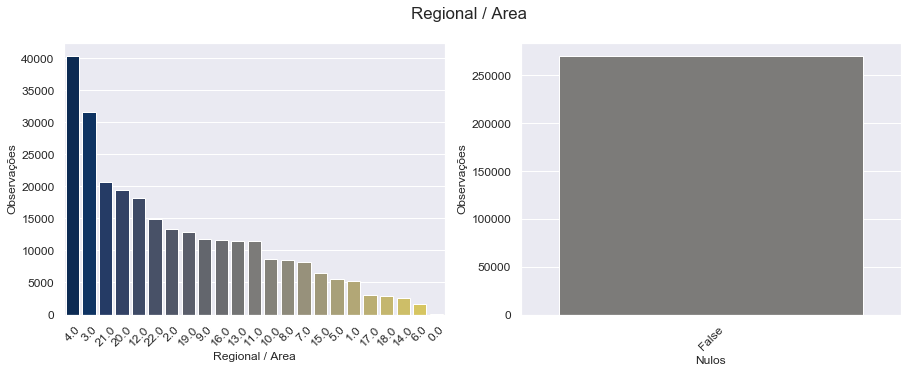

In [38]:
plot_numerical(df, 'dis_regional_area', 'Regional / Area')

#### Variável `dis_unidade`

265.00    9751
192.00    8418
236.00    7424
3.00      5035
6.00      4668
5.00      4650
293.00    4557
231.00    4127
234.00    4048
242.00    4041
221.00    3890
235.00    3778
290.00    3730
286.00    3633
238.00    3620
10.00     3388
220.00    3050
223.00    2913
283.00    2782
237.00    2699
244.00    2693
219.00    2670
2.00      2655
232.00    2619
222.00    2576
240.00    2513
241.00    2485
228.00    2466
239.00    2456
304.00    2440
258.00    2407
288.00    2332
24.00     2300
226.00    2290
69.00     2271
245.00    2108
301.00    2099
243.00    2072
11.00     2060
278.00    1986
16.00     1955
264.00    1942
292.00    1897
4.00      1865
315.00    1865
259.00    1840
165.00    1633
121.00    1600
284.00    1530
85.00     1507
126.00    1485
311.00    1420
298.00    1400
295.00    1385
326.00    1385
120.00    1366
156.00    1325
57.00     1300
14.00     1274
9.00      1261
297.00    1255
296.00    1210
306.00    1200
73.00     1191
263.00    1167
64.00     1131
300.00    

Nulls: 0 (0.00%) / Not Nulls: 270604 (100.00%)


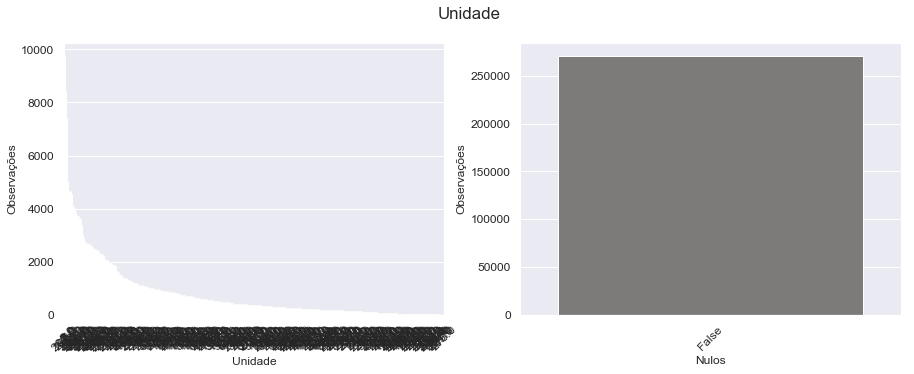

In [41]:
df['dis_unidade'].value_counts(dropna=False)
plot_numerical(df, 'dis_unidade', 'Unidade')

#### Variável `dis_grade`

Nulls: 8489 (3.14%) / Not Nulls: 262115 (96.86%)


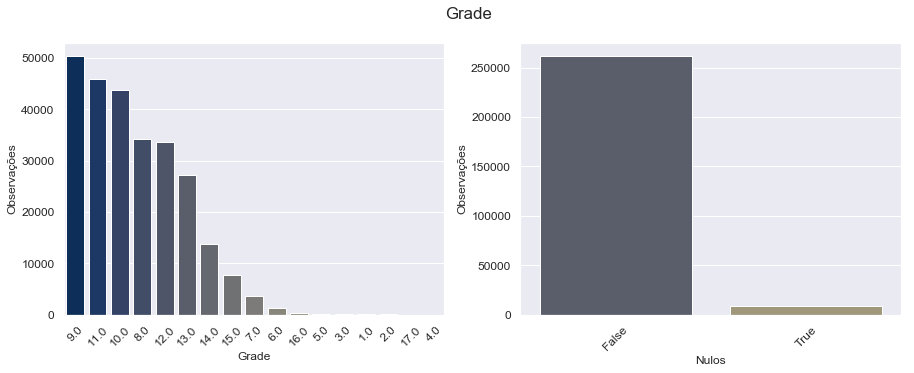

In [40]:
plot_numerical(df, 'dis_grade', 'Grade')

#### Variável `dis_nome_funcionario`

#### Variável `dis_nome_gestor`

#### Variável `dis_nome_kpi`

#### Variável `dis_peso_kpi`

#### Variável `per_ating_mes`

#### Variável `per_pontos_mes`

#### Variável `per_acum_mes`

#### Variável `per_ating_acumulado`

#### Variável `per_pontos_acumulado`

#### Variável `per_acum_acumulado`

#### Variável `per_ating_fim_exer`

#### Variável `per_pontos_fim_exer`

#### Variável `per_acum_fim_exer`